## Project: Portfolio Management Using Multi-Agent Reinforcement Learning 

## Part 2: Extract Sentiment scores from news

 - Step 0:  Install the packages if they are note previously installed.
 - Step 1:  Import the libraries.
 - Step 2:  Download data from Google-Drive if data folder does not exist.
 - Step 3:  Read Data from news dataset.
 - Step 4:  Data Filtering.
 > - Step 4.1: Filter by year.
 > - Step 4.2: Filter the news of the selected stocks.
 - Step 5: Feature Engineering 
 > - Step 5.1: Extract sentiment scores.
 > - Step 5.2: Fill the missing dates
 > - Step 5.3: Merge the sentiment scores of each ticker to on dataframe.
 - Step 6: Create data visualizations
 > - Step 6.1: Word cloud for each stock.
 > - Step 6.2: Distributions of the sentiment scores of each stock.
 - Step 7: Save sentiment scores.

#### Step 0:  Install the packages if they are note previously installed.

In [1]:
"""
This cell installs the yfinance package if only unable to import, indicating the package is not installed.
This avoids isntalling the packages again.
"""
import importlib

# Pandas Library
try:
    importlib.import_module('pandas')
except ImportError:
    !pip install pandas

# gdown Library - To download google Drive folder
try:
    importlib.import_module('gdown')
except ImportError:
    !pip install gdown
    
# textblob
try:
    importlib.import_module('textblob')
except ImportError:
    !pip install textblob
    
    
# gensim
try:
    importlib.import_module('gensim')
except ImportError:
    !pip install gensim
    
# nltk
try:
    importlib.import_module('nltk')
except ImportError:
    !pip install nltk
    
# wordcloud
try:
    importlib.import_module('wordcloud')
except ImportError:
    !pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.4/294.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 14.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 661.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 957.4 kB/s eta 0:00:00a 0:00:01


#### Step 1:  Import the libraries.

In [2]:
import os                       # Operating system library for accessing files and directories.
import datetime                 # To work with date and time data-types.
import string                   # To work with string manuplations
import re                       # Supports regular expression operations

import numpy as np              # Core numerical computing library for arrays and matrices
import pandas as pd             # Core library for manipulating and analyzing data.

import gdown                    # Helps download files from google drive

import nltk                     # Natural Language Toolkit library for text processing and analysis
nltk.download('stopwords')      # import stopwords.
from gensim.parsing.preprocessing import remove_stopwords    # Imports function to remove stopwords.
from textblob import TextBlob   # imports TextBlob for generating sentiment polarity.


from wordcloud import WordCloud, STOPWORDS  # Helps to generate wordclouds

import matplotlib.pyplot as plt             # pyplot helps to create visualizations
import seaborn as sns                       # To create statistical visualizations from data

from PIL import Image                       # Python imaging library to work with images.



[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


#### Step 2:  Download data from Google-Drive if data folder does not exist.

In [3]:
# The link for the data folder in Google drive. 
data_url = "https://drive.google.com/drive/folders/1zQGlgh5kHTXSq7eoyXf6i_uAWYFJ5xzx?usp=share_link"

current_path = os.getcwd() # Get the current working directory.

data_folder_path = os.path.join(os.getcwd(),"genie_data") # Generate data folder path. 

In [4]:
# Check if the folder already exists locally

if not os.path.exists(data_folder_path):
    
    os.makedirs(data_folder_path)
    print(f"Downloading data from Google Drive to: {data_folder_path}")
    gdown.download_folder(data_url,output=data_folder_path, quiet=True, use_cookies=False) # Download the data from Google Drive.
    
else:
    print(f"Directory already exists: {data_folder_path}")

#### Step 3:  Read Data from news dataset.

In [5]:
start_date      = '2005-01-01'         # the start date of the analysis
end_date        = '2020-12-31'         # the end date of the analysis

In [6]:
headlines_data = pd.read_csv('./genie_data/raw_partner_headlines.csv') # Read dataset and convert to dataframe.

In [7]:
headlines_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,2,Agilent Technologies Announces Pricing of $5……...,http://www.gurufocus.com/news/1153187/agilent-...,GuruFocus,2020-06-01 00:00:00,A
1,3,Agilent (A) Gears Up for Q2 Earnings: What's i...,http://www.zacks.com/stock/news/931205/agilent...,Zacks,2020-05-18 00:00:00,A
2,4,J.P. Morgan Asset Management Announces Liquida...,http://www.gurufocus.com/news/1138923/jp-morga...,GuruFocus,2020-05-15 00:00:00,A
3,5,"Pershing Square Capital Management, L.P. Buys ...",http://www.gurufocus.com/news/1138704/pershing...,GuruFocus,2020-05-15 00:00:00,A
4,6,Agilent Awards Trilogy Sciences with a Golden ...,http://www.gurufocus.com/news/1134012/agilent-...,GuruFocus,2020-05-12 00:00:00,A


In [8]:
headlines_data.shape # defines the shape of dataframe.

(1845559, 6)

#### Step 4:  Data Filtering

 > - ##### Step 4.1: Filter by year.

In [9]:
headlines_data["date"] = pd.to_datetime(headlines_data["date"]) # convert string to datetime component

headlines_data["year"] = headlines_data["date"].dt.year         # Extract year from date component

In [10]:
# Filter the data by year.
headlines_data = headlines_data[(headlines_data['year'] >= 2005) & (headlines_data['year'] <= 2020)] 


In [11]:
headlines_data.shape # Size of the dataset.

(1845558, 7)

In [12]:
# Remove any duplicates from the dataset.
headlines_data = headlines_data.drop_duplicates(subset=['headline', 'stock','date'], keep='first')

In [13]:
headlines_data.shape # there were 22843 duplicate records.

(1822715, 7)

 > - ##### Step 4.2: Filter the news of the selected stocks.

In [14]:
def filter_records(df, stock, possible_phrases):
    """ 
    This function helps to return new dataframe with the relacent news.
    """
    
    search_phrase = " | ".join(possible_phrases)
    new_df = df.loc[(df['stock'] == stock) | (headlines_data['headline'].str.contains(search_phrase, case=False))]
    new_df = new_df.reset_index().sort_values(by='date')
    return new_df[["date","headline"]]
    

In [15]:
# apply filter to each ticker.

ENPH_headlines    = filter_records(headlines_data,"ENPH",["Enphase Energy Inc","Enphase Energy","ENPH"])
KEY_headlines     = filter_records(headlines_data,"KEY",["KeyCorp","KeyBank"])
DAL_headlines     = filter_records(headlines_data,"DAL",["Delta Airlines Corp","Delta Airlines","DEL"])
LNC_headlines     = filter_records(headlines_data,"LNC",["Lincoln National Corp","Lincoln National","LNC"])
ETSY_headlines    = filter_records(headlines_data,"ETSY",["Etsy Inc","Etsy"])

XEL_headlines     = filter_records(headlines_data,"XEL",["Xcel Energy Inc","Xcel Energy","XEL"])
PG_headlines      = filter_records(headlines_data,"PG",["P&G","Procter & Gamble Co","Procter & Gamble","PG"])
LNT_headlines     = filter_records(headlines_data,"LNT",["Alliant","Alliant Energy","Alliant Energy Corporation","LNT"])
PEP_headlines     = filter_records(headlines_data,"PEP",["PepsiCo"])
D_headlines       = filter_records(headlines_data,"D",["Dominion Energy Inc","Dominion Energy"])

#### Step 5: Feature Engineering - Extract sentiment scores.

> -  ####  Step 5.1: Extract sentiment scores.

In [16]:
def process_sentence(sentence):
    """
    Process the sentence to convert to lower case, remove digits, puntuation, and stopwords.
    """
    
    l_sentence = sentence.lower()                    # Convert the sentence to lower case.
    rd_sentence = re.sub(r'\d+', '', l_sentence)     # Remove the digits from the sentence.
    # Replace punctuations in a sentence.
    plain_sentence = rd_sentence.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    plain_sentence = plain_sentence.strip()          # Strip the extra white speaces from corners
    return remove_stopwords(plain_sentence)   # Remove stop words.

In [17]:
def get_sentiment_polarity(sentence):
    """
    Returns the sentiment polarity of the sentence provided.
    """
    
    processes_sentence = process_sentence(sentence)
    return TextBlob(processes_sentence).sentiment.polarity  # Return the sentence sentiment polarity/ score.

In [18]:
ENPH_headlines["SentimentScore"]   = ENPH_headlines["headline"].apply(get_sentiment_polarity)
KEY_headlines["SentimentScore"]    = KEY_headlines["headline"].apply(get_sentiment_polarity)
DAL_headlines["SentimentScore"]    = DAL_headlines["headline"].apply(get_sentiment_polarity)
LNC_headlines["SentimentScore"]    = LNC_headlines["headline"].apply(get_sentiment_polarity)
ETSY_headlines["SentimentScore"]   = ETSY_headlines["headline"].apply(get_sentiment_polarity)


XEL_headlines["SentimentScore"]    = XEL_headlines["headline"].apply(get_sentiment_polarity)
PG_headlines["SentimentScore"]     = PG_headlines["headline"].apply(get_sentiment_polarity)
LNT_headlines["SentimentScore"]    = LNT_headlines["headline"].apply(get_sentiment_polarity)
PEP_headlines["SentimentScore"]    = PEP_headlines["headline"].apply(get_sentiment_polarity)
D_headlines["SentimentScore"]      = D_headlines["headline"].apply(get_sentiment_polarity)


 > - #### Step 5.2: Fill the missing dates

In [19]:
# Geenrate a intermedite dataframe with continuous dates in them.
dates_list = pd.date_range(start=start_date, end=end_date) 
dates_df = pd.DataFrame({'date': dates_list})
dates_df

,date
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
5839,2020-12-27
5840,2020-12-28
5841,2020-12-29
5842,2020-12-30


In [20]:
def add_missing_date(df):
    return df.merge(dates_df, on='date', how='outer')

In [21]:
ENPH_sentiment_scores  = add_missing_date(ENPH_headlines)[["date","SentimentScore"]]
KEY_sentiment_scores   = add_missing_date(KEY_headlines)[["date","SentimentScore"]]
DAL_sentiment_scores   = add_missing_date(DAL_headlines)[["date","SentimentScore"]]
LNC_sentiment_scores   = add_missing_date(LNC_headlines)[["date","SentimentScore"]]
ETSY_sentiment_scores  = add_missing_date(ETSY_headlines)[["date","SentimentScore"]]

XEL_sentiment_scores   = add_missing_date(XEL_headlines)[["date","SentimentScore"]]
PG_sentiment_scores    = add_missing_date(PG_headlines)[["date","SentimentScore"]]
LNT_sentiment_scores   = add_missing_date(LNT_headlines)[["date","SentimentScore"]]
PEP_sentiment_scores   = add_missing_date(PEP_headlines)[["date","SentimentScore"]]
D_sentiment_scores     = add_missing_date(D_headlines)[["date","SentimentScore"]]

In [22]:
ENPH_sentiment_scores[ENPH_sentiment_scores["SentimentScore"]>0]

,date,SentimentScore
7,2015-03-06,0.500000
8,2015-03-06,0.500000
9,2015-03-06,0.500000
10,2015-03-06,0.500000
11,2015-03-06,0.500000
...,...,...
240,2020-03-31,0.100000
248,2020-04-13,1.000000
252,2020-04-14,0.433333
254,2020-04-15,0.800000


In [23]:
# Replace the None values with 0

ENPH_sentiment_scores.fillna(0, inplace=True)
KEY_sentiment_scores.fillna(0, inplace=True)
DAL_sentiment_scores.fillna(0, inplace=True)
LNC_sentiment_scores.fillna(0, inplace=True)
ETSY_sentiment_scores.fillna(0, inplace=True)

XEL_sentiment_scores.fillna(0, inplace=True)
PG_sentiment_scores.fillna(0, inplace=True)
LNT_sentiment_scores.fillna(0, inplace=True)
PEP_sentiment_scores.fillna(0, inplace=True)
D_sentiment_scores.fillna(0, inplace=True)

In [24]:
# Add Tic to each stock dataframe 
ENPH_sentiment_scores["tic"]  = "ENPH"
KEY_sentiment_scores["tic"]   = "KEY"
DAL_sentiment_scores["tic"]   = "DAL"
LNC_sentiment_scores["tic"]   = "LNC"
ETSY_sentiment_scores["tic"]  = "ETSY"
 
XEL_sentiment_scores["tic"]   = "XEL"
PG_sentiment_scores["tic"]    = "PG"
LNT_sentiment_scores["tic"]   = "LNT"
PEP_sentiment_scores["tic"]   = "PEP"
D_sentiment_scores["tic"]     = "D"

> - #### Step 5.3: Merge the sentiment scores of each ticker to on dataframe.

In [25]:
# Concat the dataframes and sort by dates
sentiment_scores_df = pd.concat([ENPH_sentiment_scores,
                                 KEY_sentiment_scores,
                                 DAL_sentiment_scores,
                                 LNC_sentiment_scores,
                                 ETSY_sentiment_scores,
                                 XEL_sentiment_scores,
                                 PG_sentiment_scores,
                                 LNT_sentiment_scores,
                                 PEP_sentiment_scores,
                                 D_sentiment_scores
                                ],axis=0).sort_values(by='date')

In [26]:
sentiment_scores_df

,date,SentimentScore,tic
1036,2005-01-01,0.0,LNC
1003,2005-01-01,0.0,XEL
1762,2005-01-01,0.0,PG
2431,2005-01-01,0.0,D
155,2005-01-01,0.0,ETSY
...,...,...,...
7427,2020-12-31,0.0,KEY
5943,2020-12-31,0.0,ETSY
7021,2020-12-31,0.0,PG
6010,2020-12-31,0.0,ENPH


#### Step 6: Create data visualizations
 

> - #### Step 6.1: Word cloud for each stock.

In [27]:
def generate_word_cloud(sentences,ticker):
    """Generatees the word cloud for the list of sentenses provided."""
    
    processed_sentnces = list(map(process_sentence,sentences))
    combines_sentence = " ".join(processed_sentnces)
    mask = np.array(Image.open("./genie_data/cloud.png"))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(max_words=50, mask=mask, stopwords=stopwords, background_color="white").generate(combines_sentence)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Wordcloud for stock: {ticker}")
    plt.axis("off")
    plt.show()



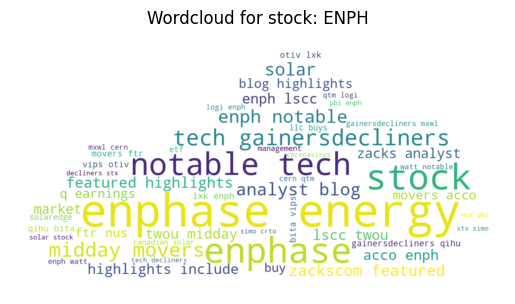

In [28]:
generate_word_cloud(ENPH_headlines["headline"],"ENPH")

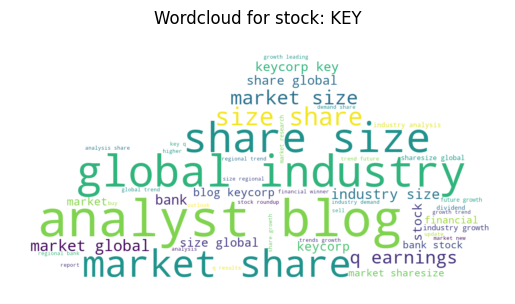

In [29]:
generate_word_cloud(KEY_headlines["headline"],"KEY")

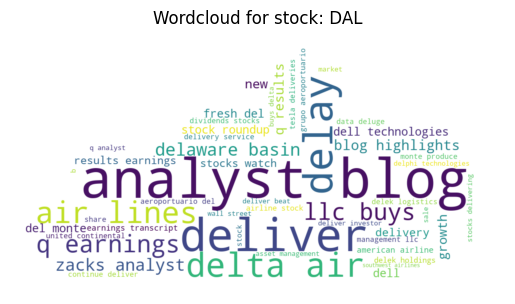

In [30]:
generate_word_cloud(DAL_headlines["headline"],"DAL")

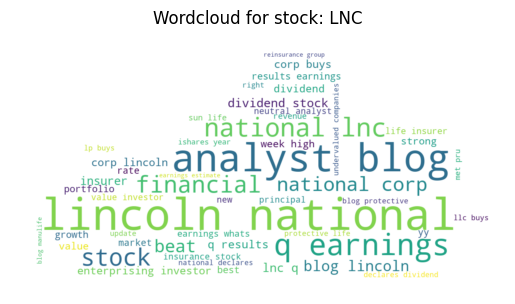

In [31]:
generate_word_cloud(LNC_headlines["headline"],"LNC")

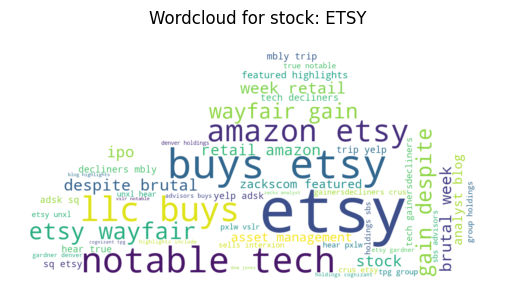

In [32]:
generate_word_cloud(ETSY_headlines["headline"],"ETSY")

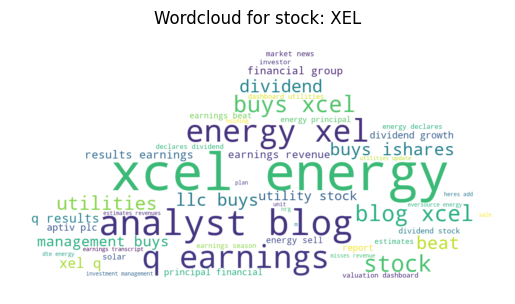

In [33]:
generate_word_cloud(XEL_headlines["headline"],"XEL")

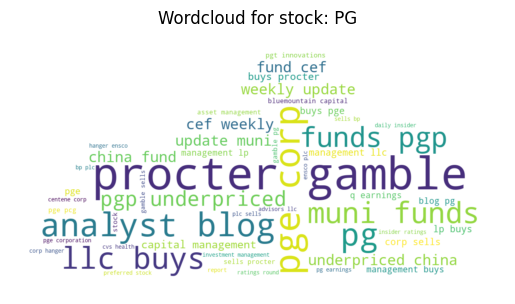

In [34]:
generate_word_cloud(PG_headlines["headline"],"PG")

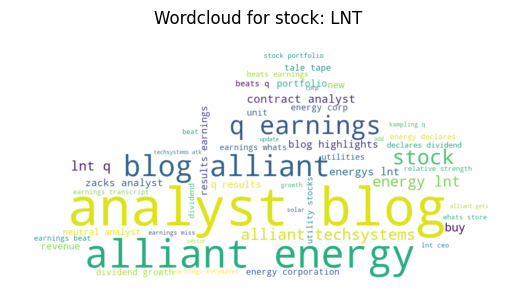

In [35]:
generate_word_cloud(LNT_headlines["headline"],"LNT")

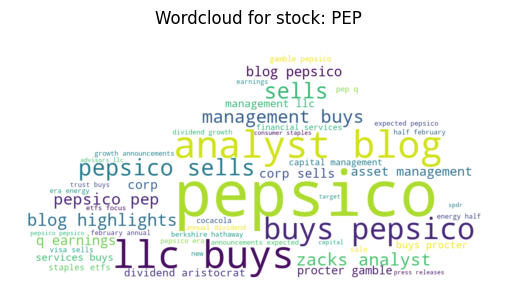

In [36]:
generate_word_cloud(PEP_headlines["headline"],"PEP")

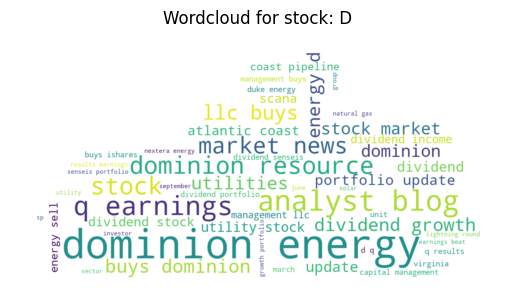

In [37]:
generate_word_cloud(D_headlines["headline"],"D")

> - #### Step 6.2: Distributions of the sentiment scores of each stock.

/var/folders/2m/qh8r6m0x3wq_kw54v2nf94rh0000gn/T/ipykernel_13281/1964082405.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentiment_scores_df[(sentiment_scores_df['tic']==tic)


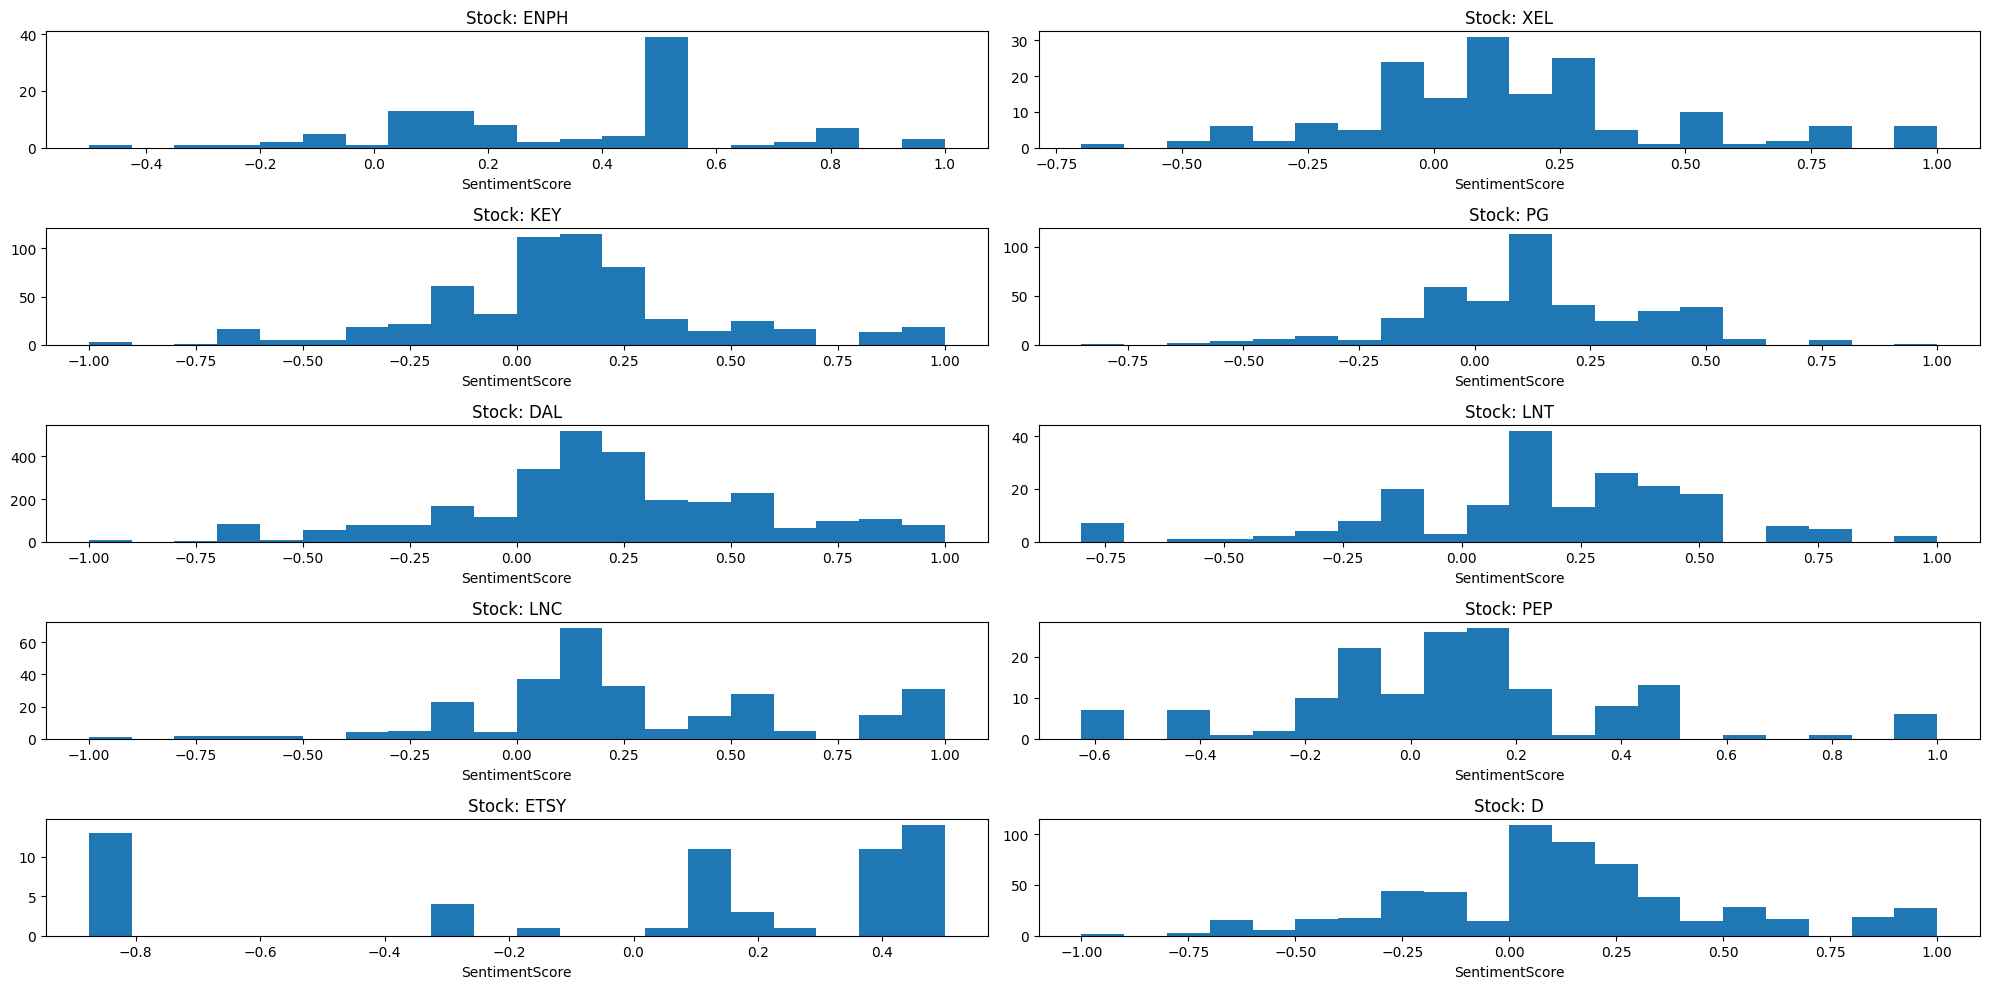

In [38]:

# create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))

# loop over categories and plot histograms
selected_tickers = ["ENPH","XEL","KEY","PG","DAL","LNT","LNC","PEP","ETSY","D"]

for i, tic in enumerate(selected_tickers):
    row = i // 2
    col = i % 2
    ax = axs[row][col]
    sns.distplot(sentiment_scores_df[(sentiment_scores_df['tic']==tic)
                                     & (sentiment_scores_df['SentimentScore']!=0)]['SentimentScore']
                 , norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1},ax=ax)
    ax.set_title(f'Stock: {tic}')

# adjust layout
plt.tight_layout()
plt.show()

#### Step 7: Save sentiment scores.

In [39]:
sentiment_scores_df.to_csv('./genie_data/sentiments_df.csv')